<a href="https://colab.research.google.com/github/yayesh16/ride-price-ml/blob/master/ride_price_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [ ]:
df = pd.read_csv("/content/rides.csv")
df.head()
df.shape

(160, 7)

In [ ]:
df.describe()

,distance_km,duration_min,ride_price
count,160.000000,160.000000,160.000000
mean,17.745750,45.705750,711.607375
std,9.795801,20.427411,199.462843
min,2.180000,10.350000,341.370000
25%,9.472500,27.925000,561.562500
50%,17.315000,47.915000,698.680000
75%,26.975000,61.950000,871.490000
max,34.570000,79.300000,1095.800000


In [ ]:
df.isnull().sum()

,0
distance_km,0
duration_min,0
time_of_day,0
traffic_level,0
weather,0
vehicle_type,0
ride_price,0


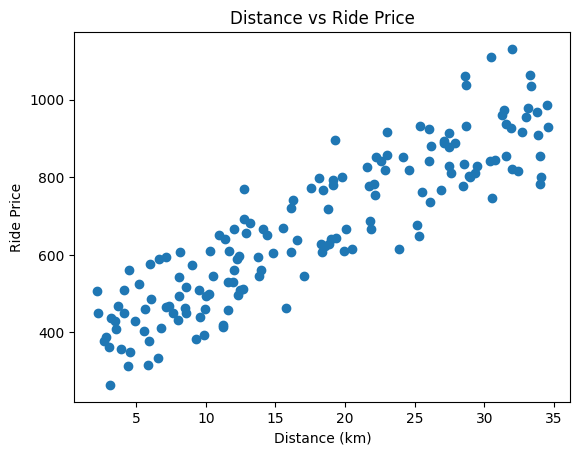

In [ ]:
plt.scatter(df['distance_km'], df['ride_price'])
plt.xlabel("Distance (km)")
plt.ylabel("Ride Price")
plt.title("Distance vs Ride Price")
plt.show()

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
print(df_encoded.columns)

Index(['distance_km', 'duration_min', 'ride_price', 'time_of_day_Evening',
       'time_of_day_Morning', 'time_of_day_Night', 'traffic_level_Low',
       'traffic_level_Medium', 'weather_Cloudy', 'weather_Rainy',
       'vehicle_type_MIDSIZE4', 'vehicle_type_MINIVAN 7',
       'vehicle_type_Ride Any EV'],
      dtype='object')


**Regression Model**

In [ ]:
X = np.asarray(df_encoded.drop('ride_price', axis=1))
y = np.asarray(df_encoded['ride_price'])

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (112, 12) (112,)
Test set: (48, 12) (48,)


In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linreg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error =", mean_absolute_error(y_test, y_pred))

Mean Absolute Error = 8.787289063362879


**Classification**

In [ ]:
df_encoded['high_cost'] = (
    df_encoded['ride_price'] > df_encoded['ride_price'].median()
).astype(int)

In [ ]:
X = np.asarray(df_encoded.drop(['ride_price', 'high_cost'], axis=1))
y = np.asarray(df_encoded['high_cost'])

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (112, 12) (112,)
Test set: (48, 12) (48,)


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of the model is =",
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8958333333333334
